## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

## **Importing Dataset**

In [2]:
df=pd.read_csv(r"/Users/aryankhan/Documents/Aryan/MBA Supply Chain Analytics & Management/Semester 3/Supply Chain Modelling/Capstone Project/retail_clean.csv")

## Section I- **Initializing Data Pre-Processing**

This section of analysis is essential to deep dive into the nature and structure of dataset being dealt. Starting from shape, size, head, tail of dataset to knowing about each variables statistical figures, everything is explored in this section.

In [3]:
df.shape

(779495, 10)

In [4]:
df.size

7794950

In [5]:
df.head()

Unnamed: 0  Invoice StockCode                          Description  \
0           0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1   489434    79323P                   PINK CHERRY LIGHTS   
2           2   489434    79323W                  WHITE CHERRY LIGHTS   
3           3   489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity       InvoiceDate  Price  Customer ID         Country  Revenue  
0        12  01-12-2009 07:45   6.95        13085  United Kingdom     83.4  
1        12  01-12-2009 07:45   6.75        13085  United Kingdom     81.0  
2        12  01-12-2009 07:45   6.75        13085  United Kingdom     81.0  
3        48  01-12-2009 07:45   2.10        13085  United Kingdom    100.8  
4        24  01-12-2009 07:45   1.25        13085  United Kingdom     30.0

In [6]:
df.tail()

Unnamed: 0  Invoice StockCode                      Description  \
779490     1067366   581587     22899     CHILDREN'S APRON DOLLY GIRL    
779491     1067367   581587     23254    CHILDRENS CUTLERY DOLLY GIRL    
779492     1067368   581587     23255  CHILDRENS CUTLERY CIRCUS PARADE   
779493     1067369   581587     22138    BAKING SET 9 PIECE RETROSPOT    
779494     1067370   581587      POST                          POSTAGE   

        Quantity       InvoiceDate  Price  Customer ID Country  Revenue  
779490         6  09-12-2011 12:50   2.10        12680  France    12.60  
779491         4  09-12-2011 12:50   4.15        12680  France    16.60  
779492         4  09-12-2011 12:50   4.15        12680  France    16.60  
779493         3  09-12-2011 12:50   4.95        12680  France    14.85  
779494         1  09-12-2011 12:50  18.00        12680  France    18.00

In [7]:
df.keys()

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  int64  
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 59.5+ MB


**Interpretation**:This dataset contains 
**numerical value variables**- Invoice, Quantity, Price, Customer ID and Revenue
**Categorical value variables**- StockCode, Description & Country
**Date/Time**- Invoice Date 

In [9]:
df.head()

Unnamed: 0  Invoice StockCode                          Description  \
0           0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1   489434    79323P                   PINK CHERRY LIGHTS   
2           2   489434    79323W                  WHITE CHERRY LIGHTS   
3           3   489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity       InvoiceDate  Price  Customer ID         Country  Revenue  
0        12  01-12-2009 07:45   6.95        13085  United Kingdom     83.4  
1        12  01-12-2009 07:45   6.75        13085  United Kingdom     81.0  
2        12  01-12-2009 07:45   6.75        13085  United Kingdom     81.0  
3        48  01-12-2009 07:45   2.10        13085  United Kingdom    100.8  
4        24  01-12-2009 07:45   1.25        13085  United Kingdom     30.0

In [10]:
df.describe()

Unnamed: 0        Invoice       Quantity          Price  \
count  7.794950e+05  779495.000000  779495.000000  779495.000000   
mean   5.315660e+05  537427.005391      13.507085       3.218199   
std    3.110433e+05   26901.961110     146.540284      29.674823   
min    0.000000e+00  489434.000000       1.000000       0.000000   
25%    2.598405e+05  514483.000000       2.000000       1.250000   
50%    5.071680e+05  536754.000000       6.000000       1.950000   
75%    8.114895e+05  562002.000000      12.000000       3.750000   
max    1.067370e+06  581587.000000   80995.000000   10953.500000   

         Customer ID        Revenue  
count  779495.000000  779495.000000  
mean    15320.262918      22.289821  
std      1695.722988     227.416962  
min     12346.000000       0.000000  
25%     13971.000000       4.950000  
50%     15246.000000      12.480000  
75%     16794.000000      19.800000  
max     18287.000000  168469.600000

In [11]:
df.isnull().sum()

Unnamed: 0     0
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64

**Interpretation**- The dataset does not have any nulls. So there will be no requirement to treat nulls.

**Dropping Irrelevant Columns**

"Unnamed: 0" column is being dropped from the dataset as it's role is no longer relevant for further analysis

In [12]:
#Dropping Unnamed: 0

df.drop('Unnamed: 0', axis=1)

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
779490   581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
779491   581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
779492   581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
779493   581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
779494   581587      POST                              POSTAGE         1   

             InvoiceDate  Price  Customer ID         Country  Revenue  
0       01-12-2009 07:45   6.95        13085  United Kingdom    83.40  
1       01-12-2009 07:45   6.75        13085  United Kingdom    81.00  
2       01-12-2009 07:45   6.75        13085  United Kingdom    81.00  
3       01-12-2009 07:45   2.10        13085  United Kingdom   100.80  
4       01-12-2009 07:45   1.25        13085  United Kingdom    30.00  
...                  ...    ...          ...             ...      ...  
779490  09-12-2011 12:50   2.10        12680          France    12.60  
779491  09-12-2011 12:50   4.15        12680          France    16.60  
779492  09-12-2011 12:50   4.15        12680          France    16.60  
779493  09-12-2011 12:50   4.95        12680          France    14.85  
779494  09-12-2011 12:50  18.00        12680          France    18.00  

[779495 rows x 9 columns]

**Date/Time Conversion**- The InvoiceDate Column is in "DD-MM-YYYY HH:MM" format. It is important to split the Date and Time and keep them in separate individual columns and conver the variable into Date/Time to make time series analysis easier.

In [13]:
# 1) Splitting InvoiceDate into separate date/time string columns in df

df[["InvoiceDate_DateStr", "InvoiceDate_TimeStr"]] = df["InvoiceDate"].str.split(" ", n=1, expand=True)

In [14]:
# 2) Converting to proper date, time, and full datetime columns in df

df["InvoiceDate_Date"] = pd.to_datetime(df["InvoiceDate_DateStr"], format="%d-%m-%Y", errors="coerce").dt.date
df["InvoiceDate_Time"] = pd.to_datetime(df["InvoiceDate_TimeStr"], format="%H:%M", errors="coerce").dt.time
df["InvoiceDate_dt"]  = pd.to_datetime(df["InvoiceDate"],        format="%d-%m-%Y %H:%M", errors="coerce")


In [15]:
# 3) Validating the result (first 5 rows with the new columns)

cols_to_show = ["InvoiceDate", "InvoiceDate_DateStr", "InvoiceDate_TimeStr",
                "InvoiceDate_Date", "InvoiceDate_Time", "InvoiceDate_dt"]
display(df[cols_to_show].head())

InvoiceDate InvoiceDate_DateStr InvoiceDate_TimeStr InvoiceDate_Date  \
0  01-12-2009 07:45          01-12-2009               07:45       2009-12-01   
1  01-12-2009 07:45          01-12-2009               07:45       2009-12-01   
2  01-12-2009 07:45          01-12-2009               07:45       2009-12-01   
3  01-12-2009 07:45          01-12-2009               07:45       2009-12-01   
4  01-12-2009 07:45          01-12-2009               07:45       2009-12-01   

  InvoiceDate_Time      InvoiceDate_dt  
0         07:45:00 2009-12-01 07:45:00  
1         07:45:00 2009-12-01 07:45:00  
2         07:45:00 2009-12-01 07:45:00  
3         07:45:00 2009-12-01 07:45:00  
4         07:45:00 2009-12-01 07:45:00

## **Exploratory Data Analysis**

## Section II - **UNIVARIATE ANALYSIS**

**Section 2.1**- For Numerical Columns, **histogram** and **boxplot** will be the best method to check. Boxplot will help in checking for outliers and parallely a code to show description of individual columns such as min, max, std.dev, etc. is used.


Numeric Column: Unnamed: 0
count    7.794950e+05
mean     5.315660e+05
std      3.110433e+05
min      0.000000e+00
25%      2.598405e+05
50%      5.071680e+05
75%      8.114895e+05
max      1.067370e+06
Name: Unnamed: 0, dtype: float64


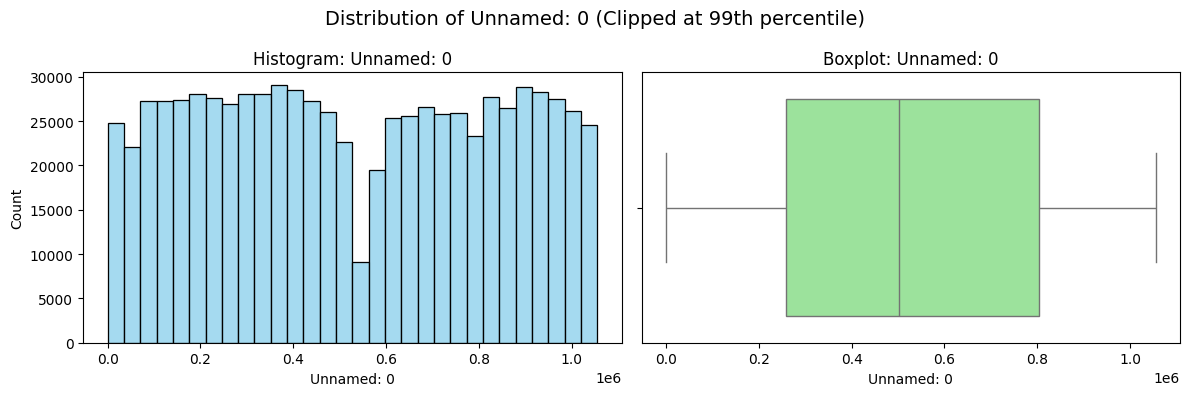


Numeric Column: Invoice
count    779495.000000
mean     537427.005391
std       26901.961110
min      489434.000000
25%      514483.000000
50%      536754.000000
75%      562002.000000
max      581587.000000
Name: Invoice, dtype: float64


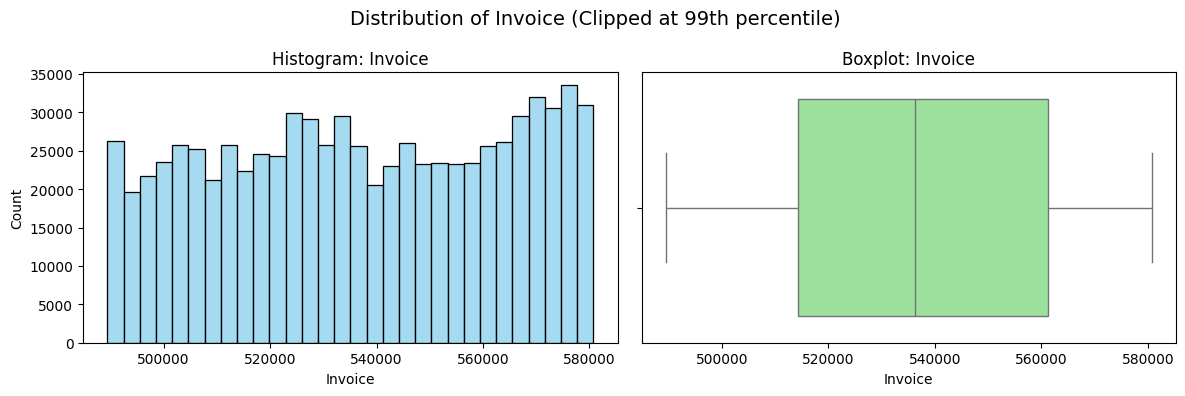


Numeric Column: Quantity
count    779495.000000
mean         13.507085
std         146.540284
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


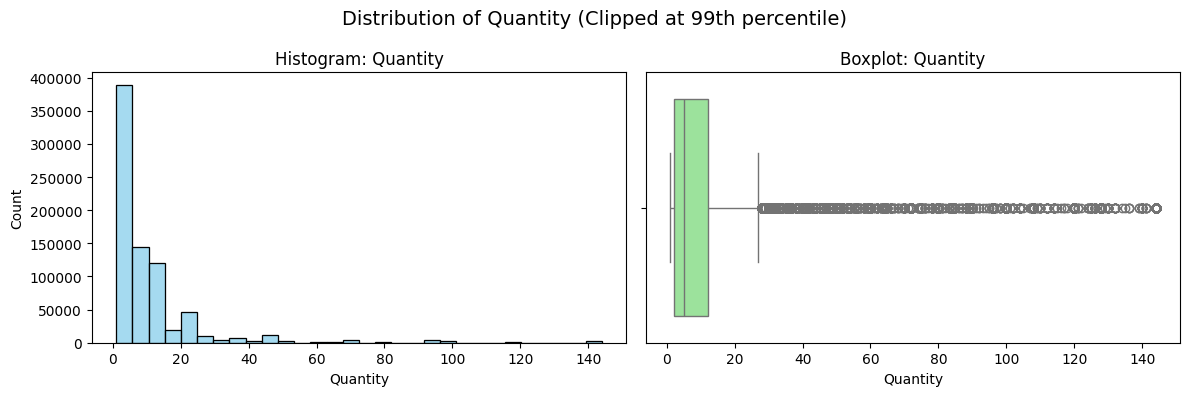


Numeric Column: Price
count    779495.000000
mean          3.218199
std          29.674823
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64


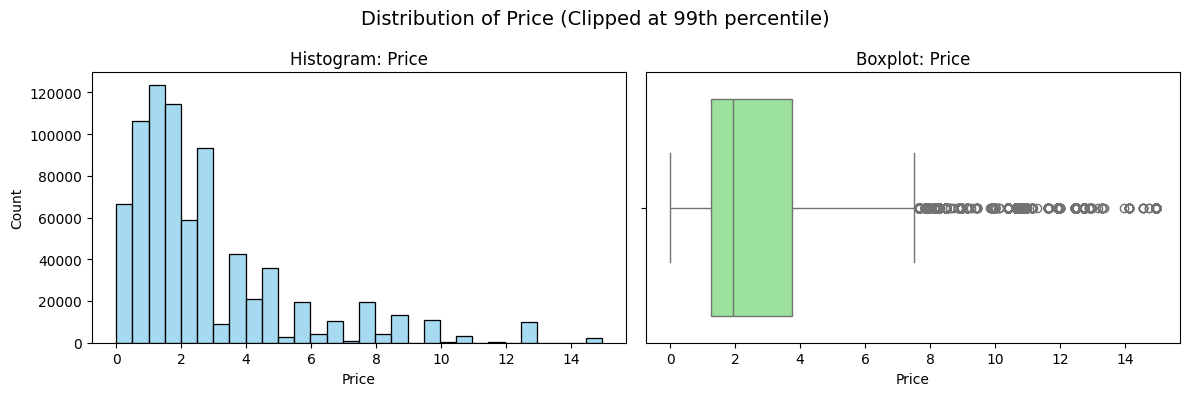


Numeric Column: Customer ID
count    779495.000000
mean      15320.262918
std        1695.722988
min       12346.000000
25%       13971.000000
50%       15246.000000
75%       16794.000000
max       18287.000000
Name: Customer ID, dtype: float64


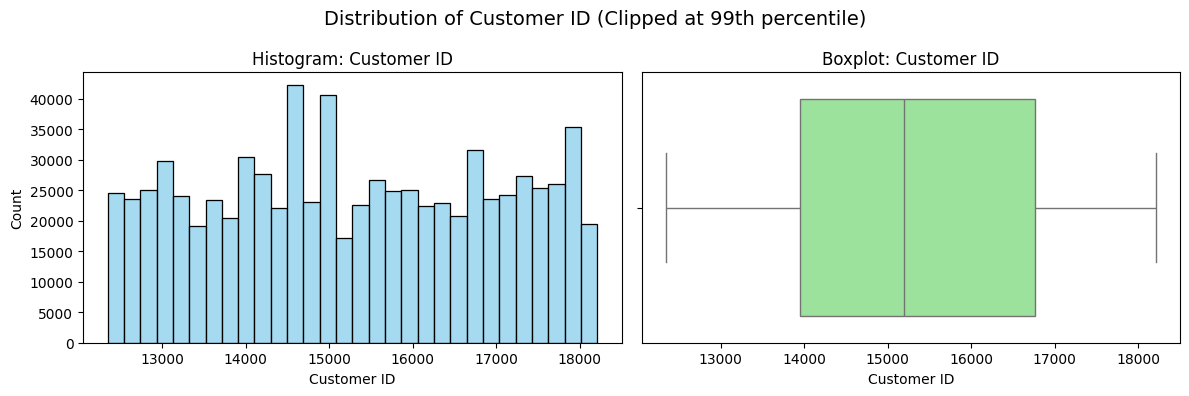


Numeric Column: Revenue
count    779495.000000
mean         22.289821
std         227.416962
min           0.000000
25%           4.950000
50%          12.480000
75%          19.800000
max      168469.600000
Name: Revenue, dtype: float64


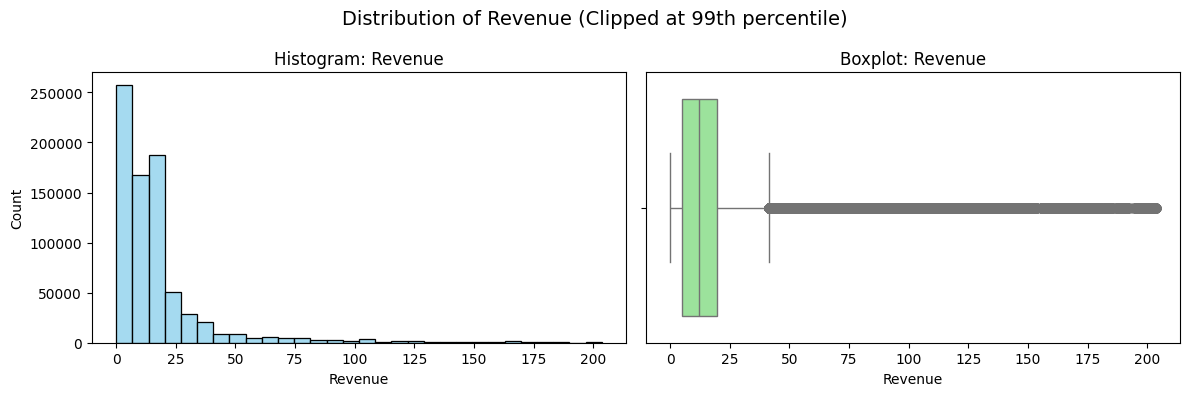

In [16]:
# 1) Numeric columns: describe + histogram + boxplot side by side

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for c in num_cols:
    print(f"\nNumeric Column: {c}")
    print(df[c].describe())
    
    # Clip at 99th percentile to handle extreme outliers
    upper_limit = df[c].quantile(0.99)
    data_clipped = df[c][df[c] <= upper_limit]
    
    # Create subplot: Histogram (left) and Boxplot (right)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(data_clipped.dropna(), bins=30, kde=False, color="skyblue", ax=axes[0])
    axes[0].set_title(f"Histogram: {c}")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("Count")
    
    # Boxplot
    sns.boxplot(x=data_clipped, color="lightgreen", ax=axes[1])
    axes[1].set_title(f"Boxplot: {c}")
    axes[1].set_xlabel(c)
    
    plt.suptitle(f"Distribution of {c} (Clipped at 99th percentile)", fontsize=14)
    plt.tight_layout()
    plt.show()


Categorical Column: StockCode
StockCode
85123A    5023
22423     3337
85099B    3296
84879     2692
20725     2609
21212     2557
47566     2099
20727     2045
22383     2039
21034     1950
Name: count, dtype: int64


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


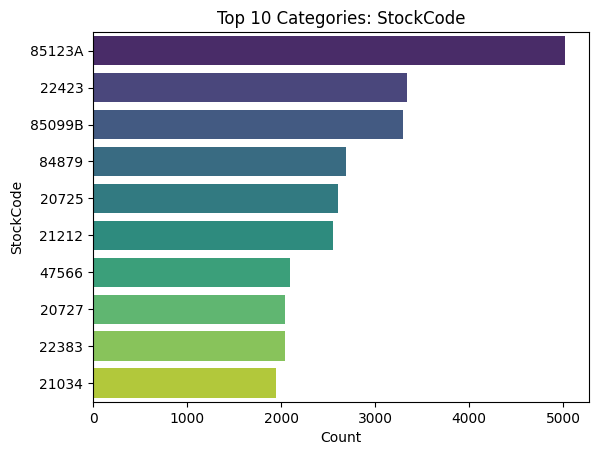


Categorical Column: Description
Description
WHITE HANGING HEART T-LIGHT HOLDER    5016
REGENCY CAKESTAND 3 TIER              3337
ASSORTED COLOUR BIRD ORNAMENT         2692
JUMBO BAG RED RETROSPOT               2641
PARTY BUNTING                         2099
LUNCH BAG  BLACK SKULL.               2045
REX CASH+CARRY JUMBO SHOPPER          1950
LUNCH BAG SPACEBOY DESIGN             1890
STRAWBERRY CERAMIC TRINKET BOX        1859
HOME BUILDING BLOCK WORD              1852
Name: count, dtype: int64


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


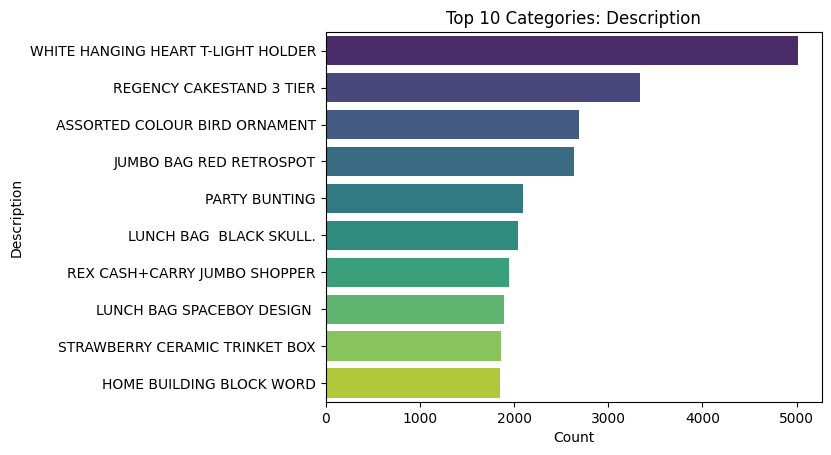


Categorical Column: InvoiceDate
InvoiceDate
14-11-2011 15:27    542
28-11-2011 15:54    533
05-12-2011 17:17    529
23-11-2011 13:39    443
31-10-2011 14:09    435
21-09-2011 14:40    421
10-11-2011 12:37    377
17-10-2011 13:31    364
10-10-2011 17:12    353
24-10-2011 17:07    352
Name: count, dtype: int64


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


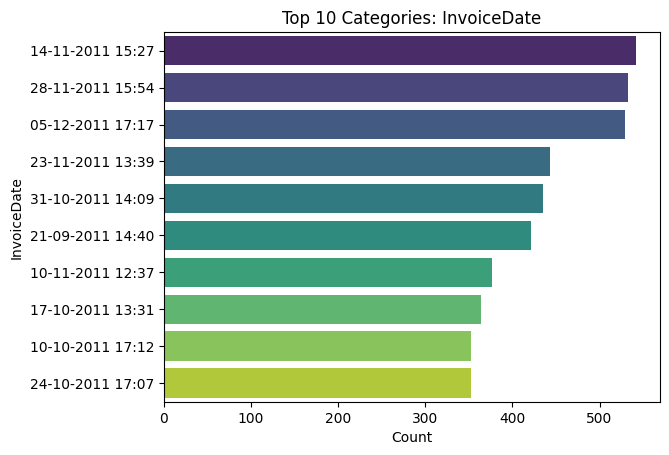

/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")



Categorical Column: Country
Country
United Kingdom    700434
Germany            16440
EIRE               15567
France             13512
Netherlands         5090
Spain               3663
Belgium             3056
Switzerland         3006
Portugal            2356
Australia           1792
Name: count, dtype: int64


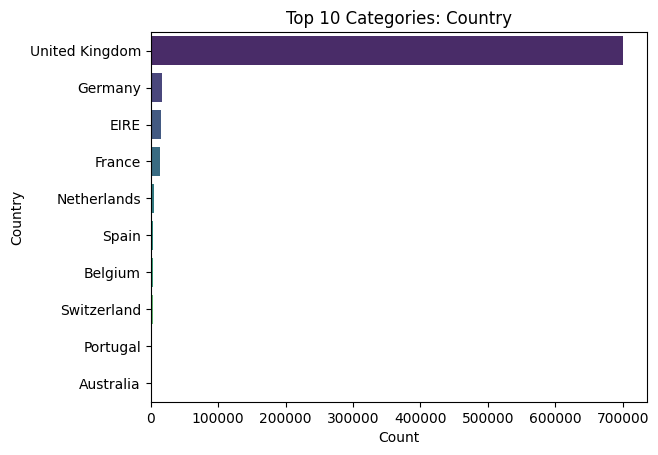


Categorical Column: InvoiceDate_DateStr
InvoiceDate_DateStr
06-11-2011    3340
05-12-2011    3335
23-11-2011    3216
21-11-2010    3151
10-11-2011    3104
20-11-2011    3003
17-11-2011    2945
25-11-2010    2938
04-11-2010    2936
14-11-2011    2854
Name: count, dtype: int64


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


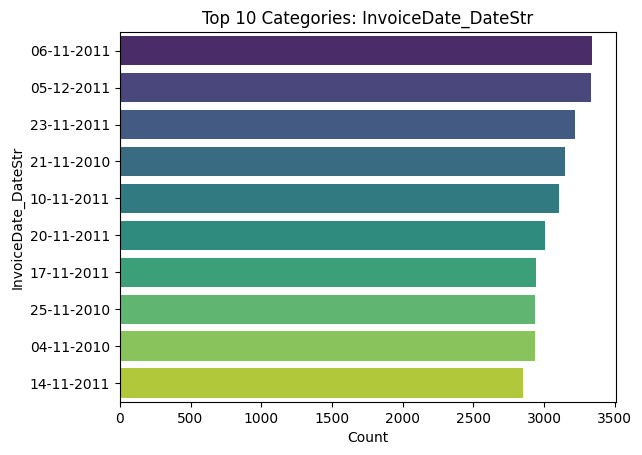


Categorical Column: InvoiceDate_TimeStr
InvoiceDate_TimeStr
12:36    3298
12:21    3059
12:16    2957
13:35    2867
12:45    2853
12:50    2846
12:06    2811
13:46    2779
13:31    2738
13:26    2722
Name: count, dtype: int64


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


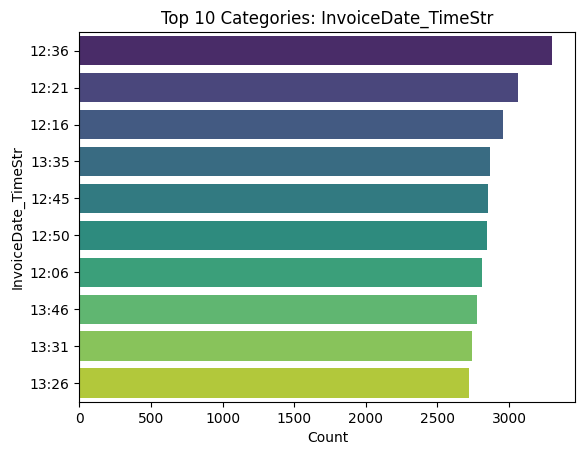


Categorical Column: InvoiceDate_Date
InvoiceDate_Date
2011-11-06    3340
2011-12-05    3335
2011-11-23    3216
2010-11-21    3151
2011-11-10    3104
2011-11-20    3003
2011-11-17    2945
2010-11-25    2938
2010-11-04    2936
2011-11-14    2854
Name: count, dtype: int64


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


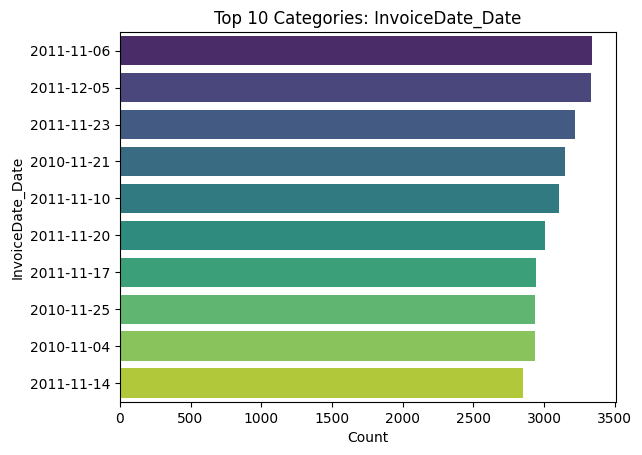

/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/1117998101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")



Categorical Column: InvoiceDate_Time
InvoiceDate_Time
12:36:00    3298
12:21:00    3059
12:16:00    2957
13:35:00    2867
12:45:00    2853
12:50:00    2846
12:06:00    2811
13:46:00    2779
13:31:00    2738
13:26:00    2722
Name: count, dtype: int64


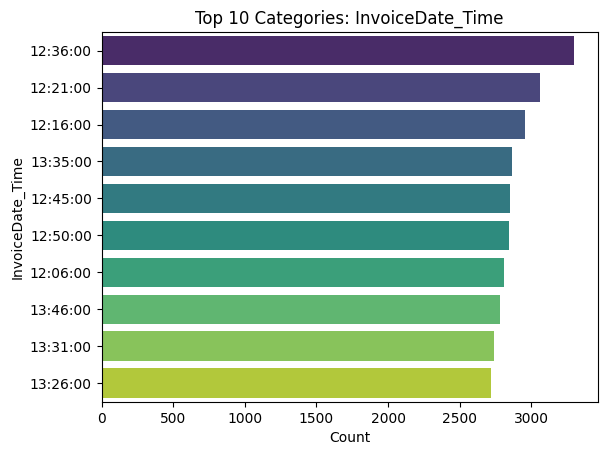

In [17]:
# 2) Categorical columns: top counts + bar chart
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

for c in cat_cols:
    print(f"\nCategorical Column: {c}")
    print(df[c].value_counts(dropna=False).head(10))
    
    # Fill missing values for visualization
    vc = df[c].fillna("Missing").value_counts().head(10)
    
    sns.barplot(x=vc.values, y=vc.index, palette="viridis")
    plt.title(f"Top 10 Categories: {c}")
    plt.xlabel("Count")
    plt.ylabel(c)
    plt.show()


Datetime Column: InvoiceDate_dt
Min: 2009-12-01 07:45:00 Max: 2011-12-09 12:50:00 Missing: 0


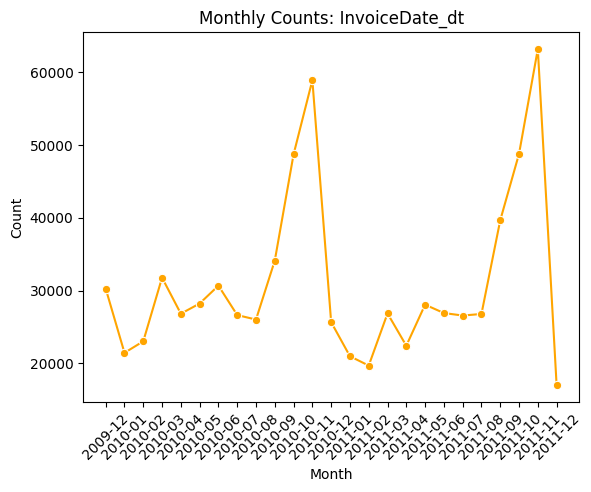

In [18]:

# 3) Datetime columns: range + monthly counts
dt_cols = df.select_dtypes(include=["datetime64[ns]"]).columns.tolist()

for c in dt_cols:
    print(f"\nDatetime Column: {c}")
    print("Min:", df[c].min(), "Max:", df[c].max(), "Missing:", df[c].isna().sum())
    
    # Group by month for trend analysis
    monthly = df[c].dt.to_period("M").value_counts().sort_index()
    monthly.index = monthly.index.astype(str)
    
    sns.lineplot(x=monthly.index, y=monthly.values, marker="o", color="orange")
    plt.title(f"Monthly Counts: {c}")
    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()

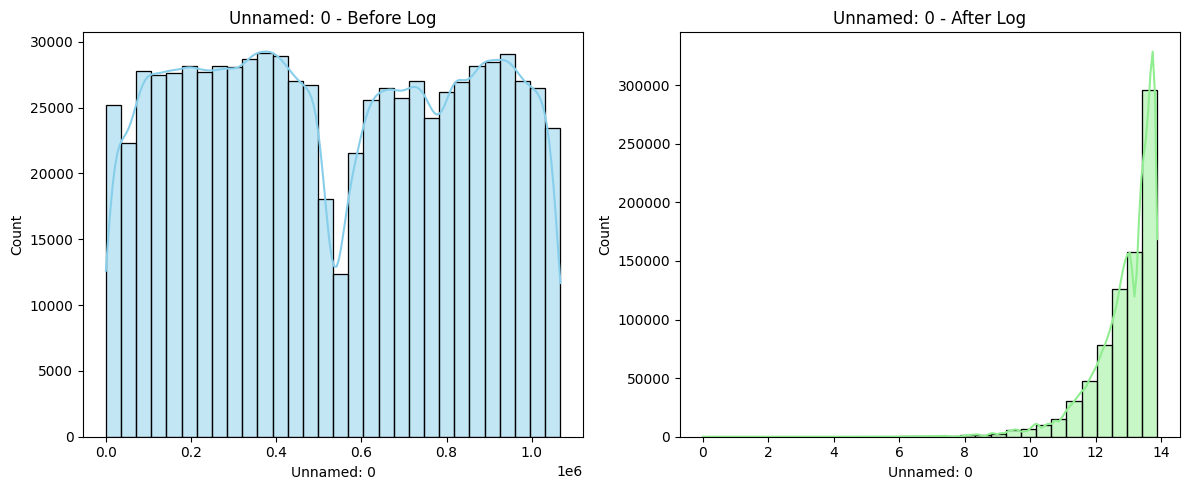

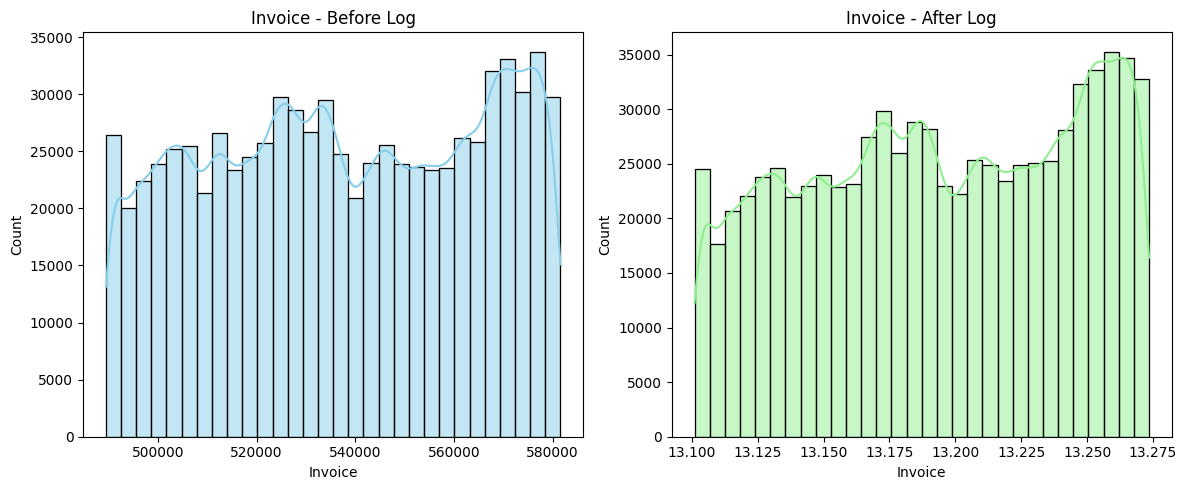

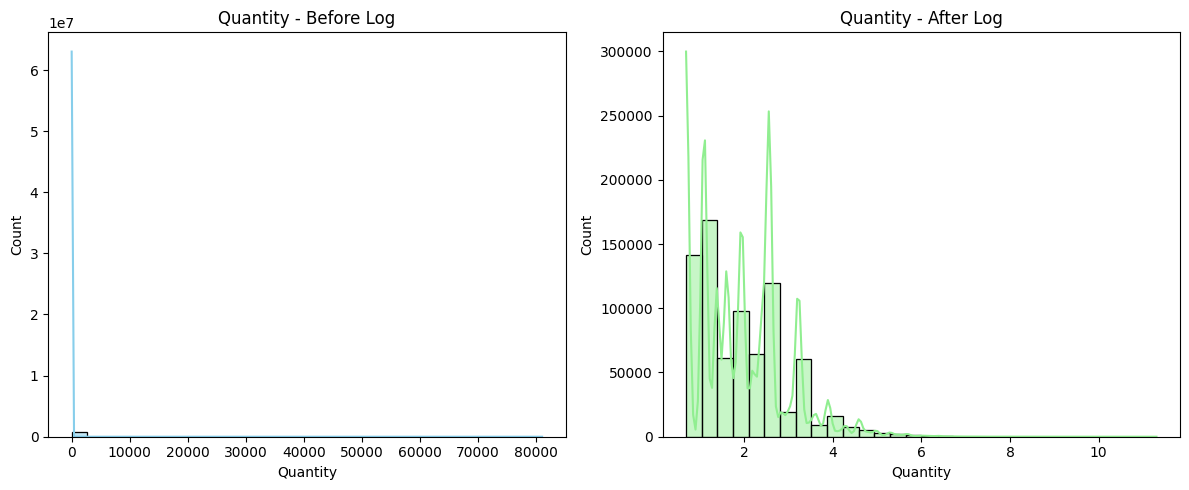

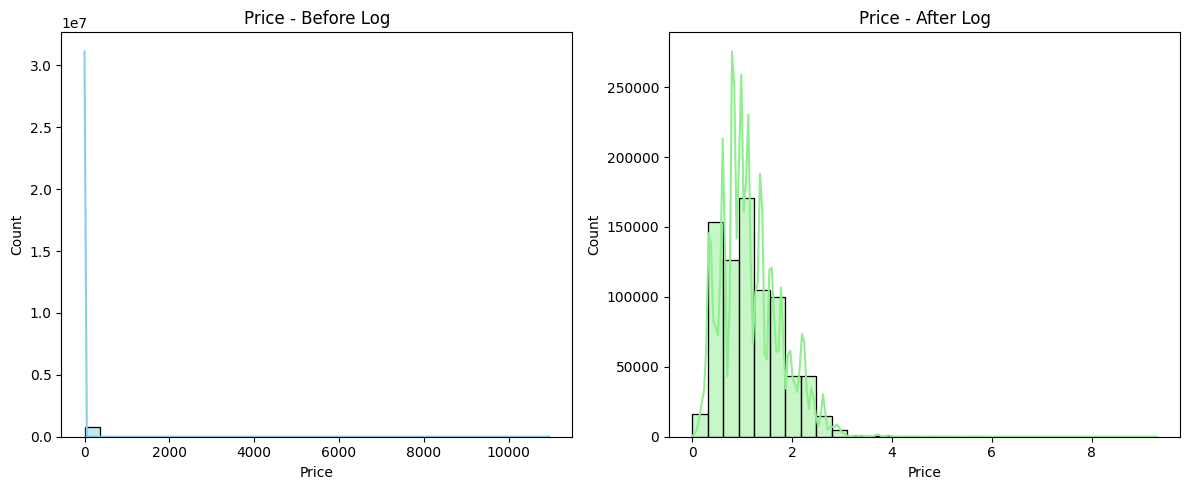

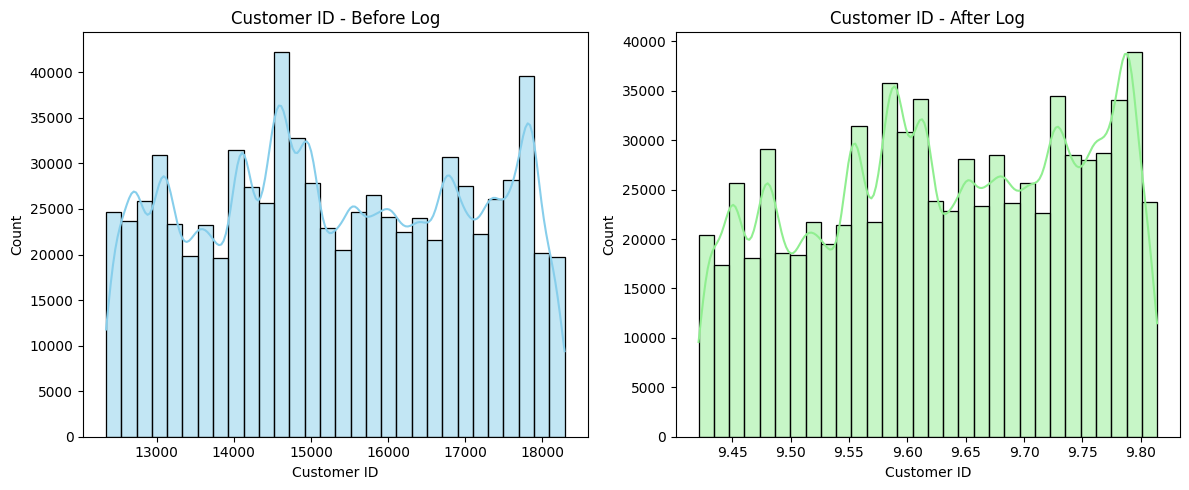

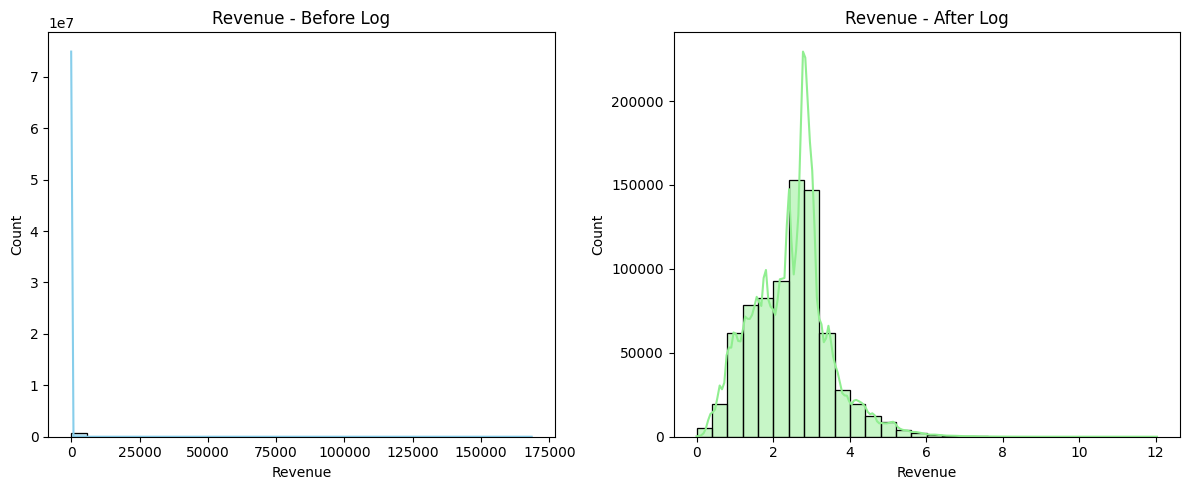

In [19]:
# Loop through all numeric columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before log transformation
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0], color="skyblue", bins=30)
    axes[0].set_title(f'{col} - Before Log')

    # After log transformation (log1p handles zeros safely)
    log_col = np.log1p(df[col].dropna())
    sns.histplot(log_col, kde=True, ax=axes[1], color="lightgreen", bins=30)
    axes[1].set_title(f'{col} - After Log')

    plt.tight_layout()
    plt.show()


**Label Encoding**- It is esential to encode categorical data for the machine to understand and provide output. Here, **Stockcode, Description and Country** requires encodeing and accordingly the code shall be applied.

In [20]:
# Create label encoder
le = LabelEncoder()

# Columns to encode
cols_to_encode = ["StockCode", "Description", "Country"]

# Apply label encoding
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))

# Verify changes
print(df[cols_to_encode].dtypes.head())
print(df[cols_to_encode].head())

StockCode      int64
Description    int64
Country        int64
dtype: object
   StockCode  Description  Country
0       4009           61       38
1       3326         3291       38
2       3328           36       38
3       1253         3620       38
4        618         4613       38


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           779495 non-null  int64         
 1   Invoice              779495 non-null  int64         
 2   StockCode            779495 non-null  int64         
 3   Description          779495 non-null  int64         
 4   Quantity             779495 non-null  int64         
 5   InvoiceDate          779495 non-null  object        
 6   Price                779495 non-null  float64       
 7   Customer ID          779495 non-null  int64         
 8   Country              779495 non-null  int64         
 9   Revenue              779495 non-null  float64       
 10  InvoiceDate_DateStr  779495 non-null  object        
 11  InvoiceDate_TimeStr  779495 non-null  object        
 12  InvoiceDate_Date     779495 non-null  object        
 13  InvoiceDate_Ti

## Section III - **Bi-Variate Analysis**

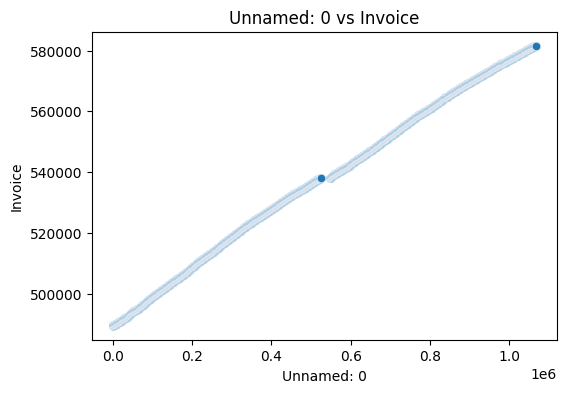

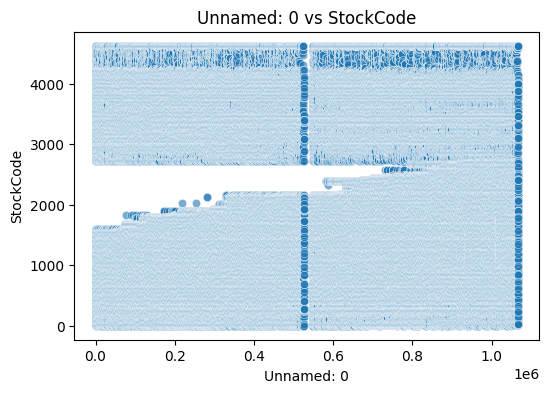

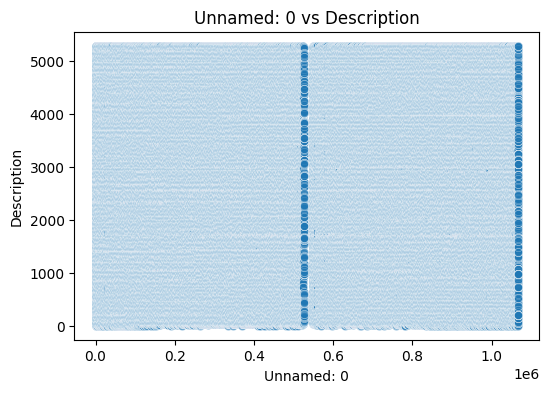

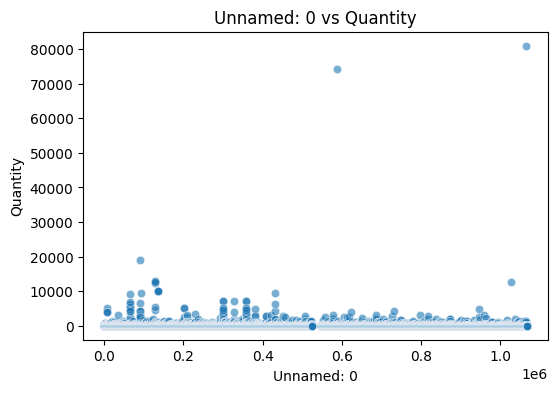

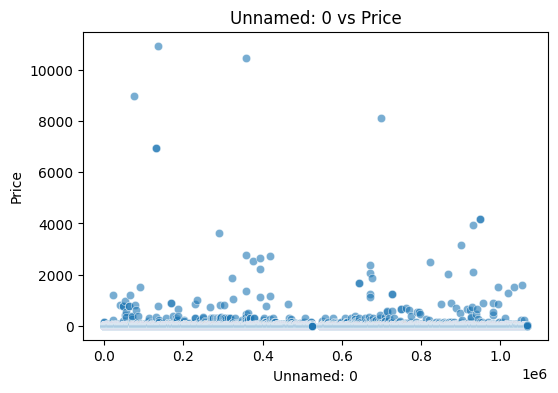

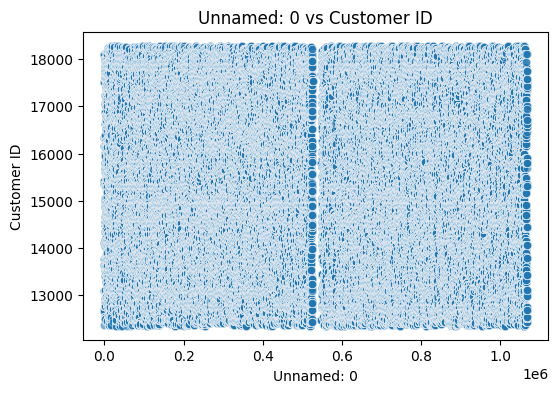

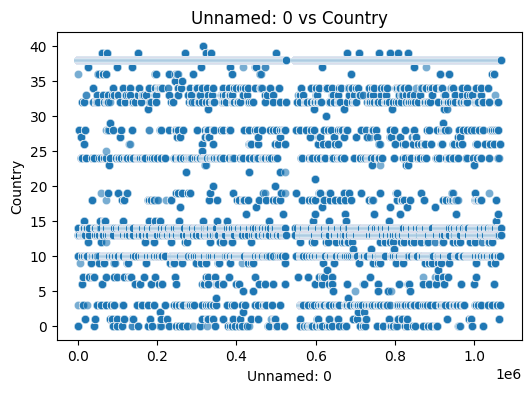

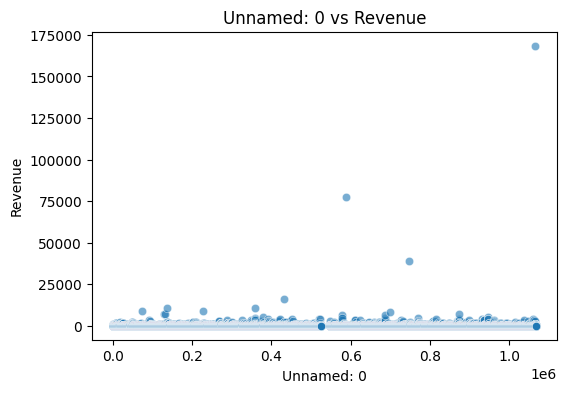

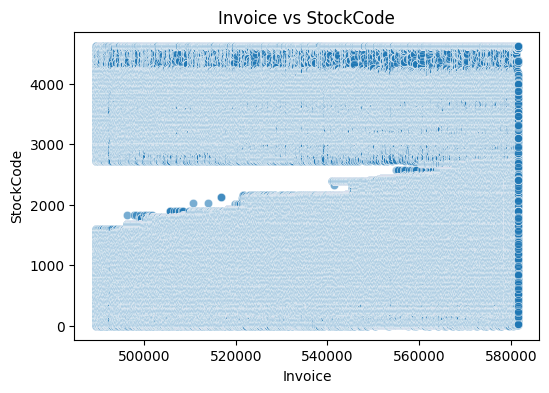

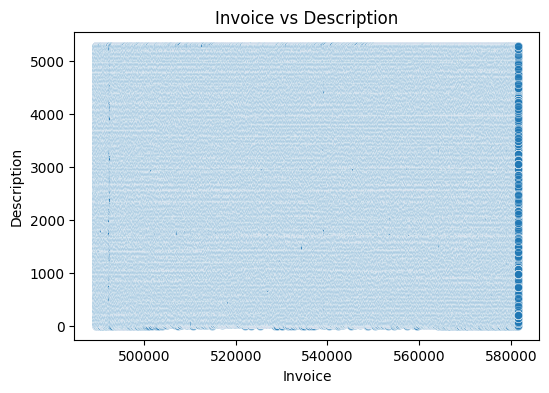

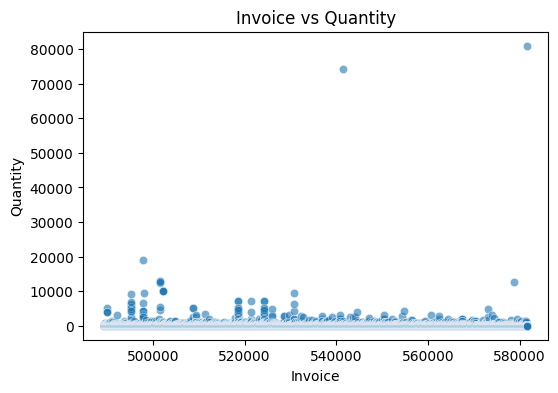

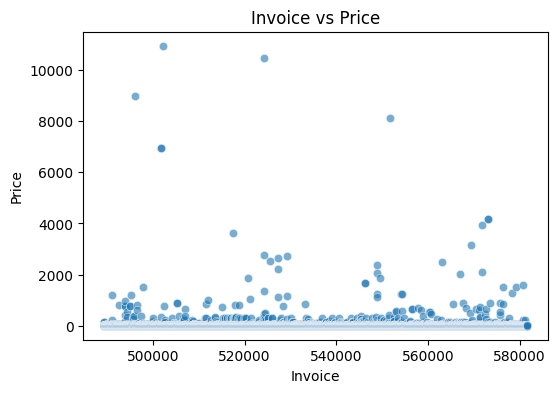

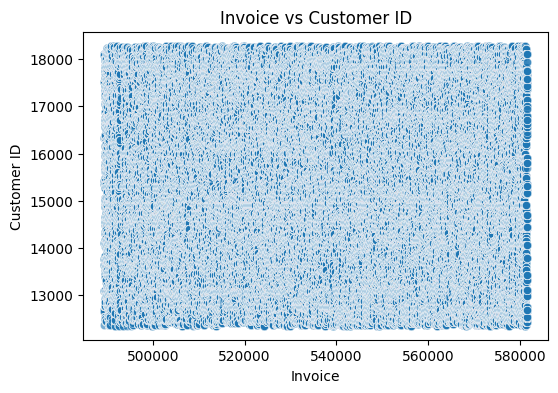

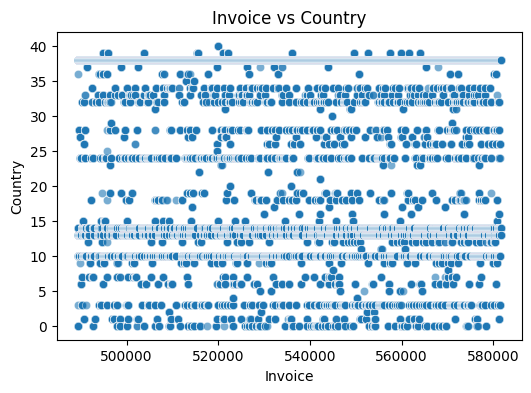

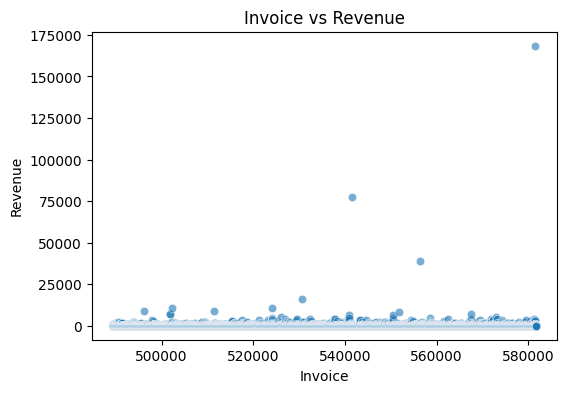

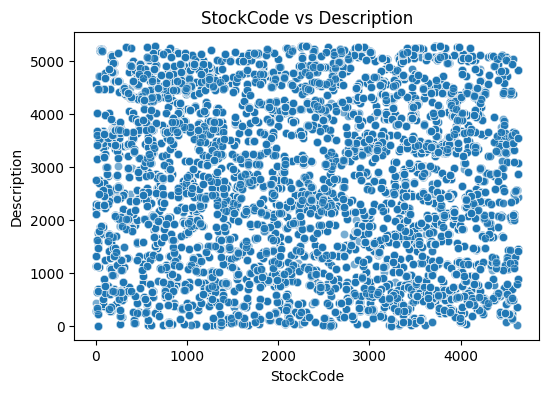

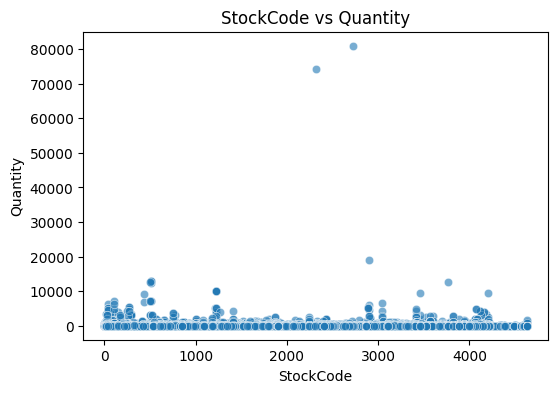

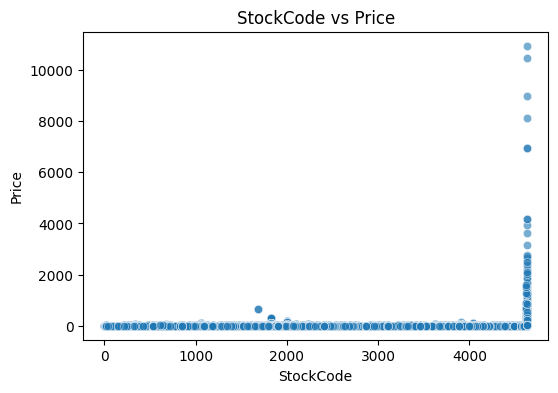

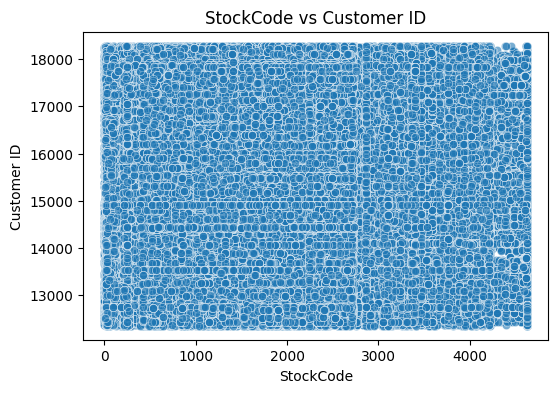

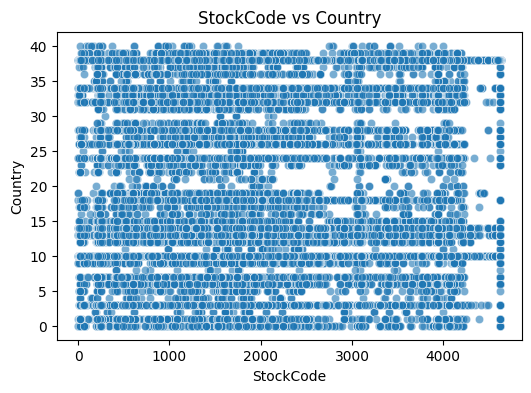

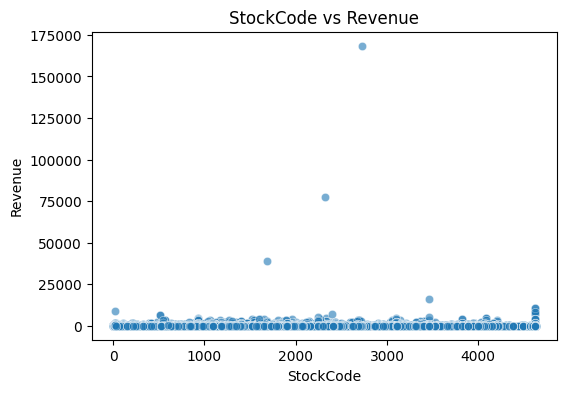

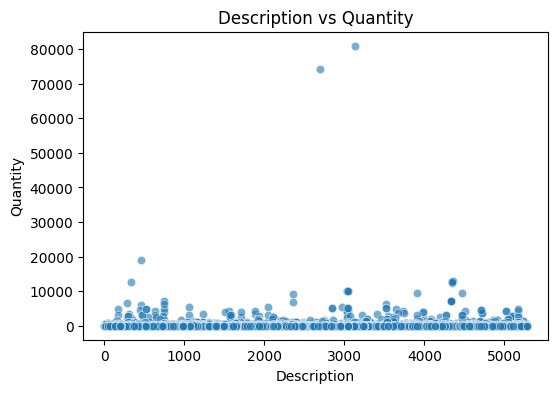

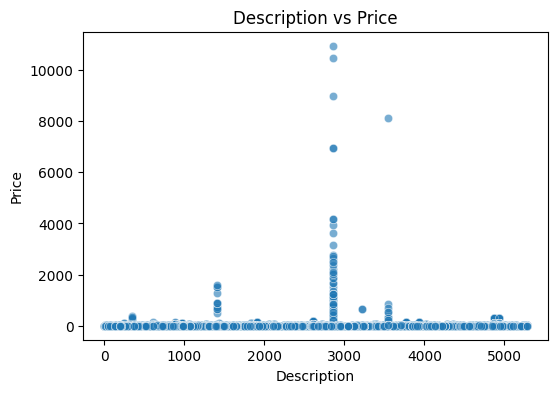

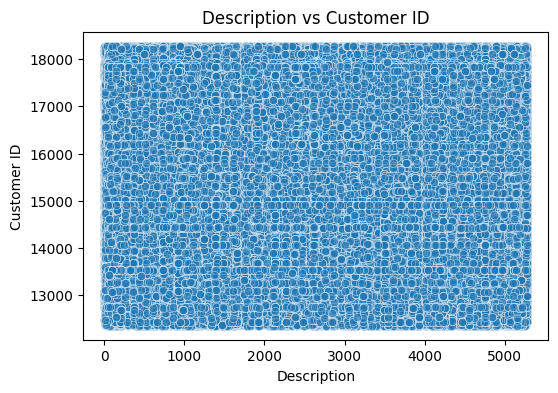

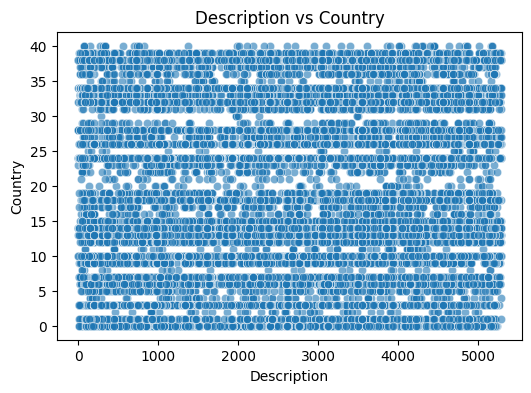

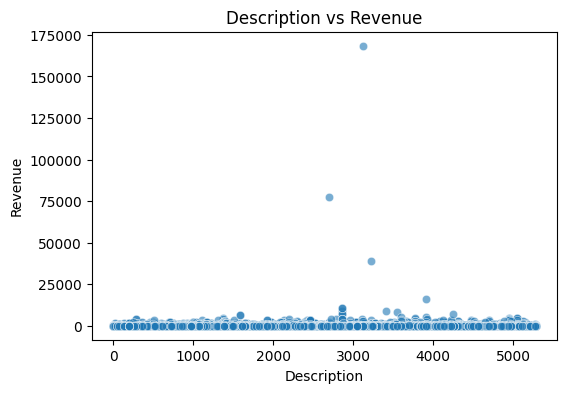

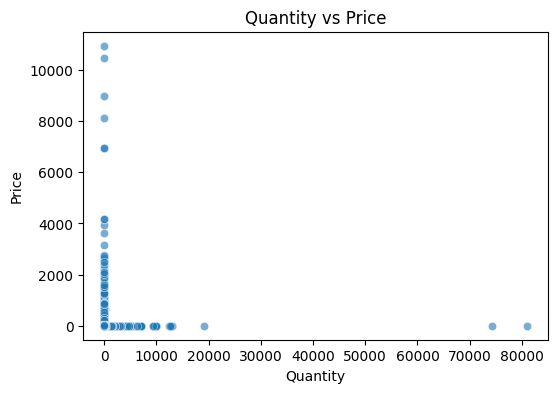

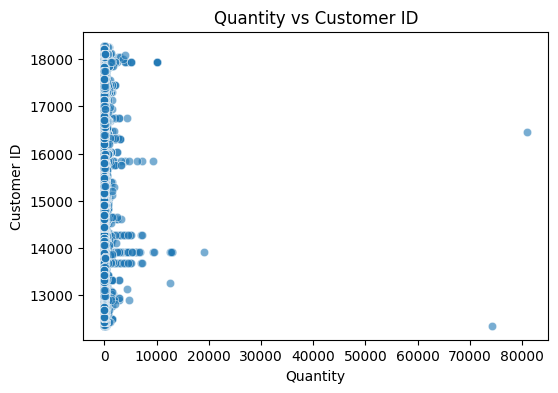

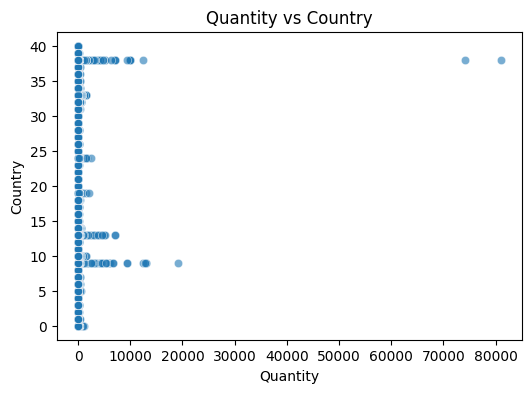

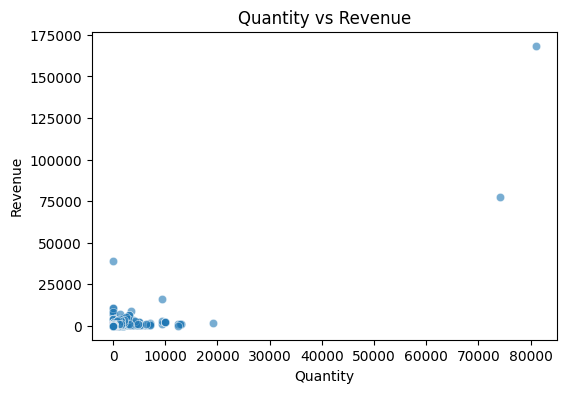

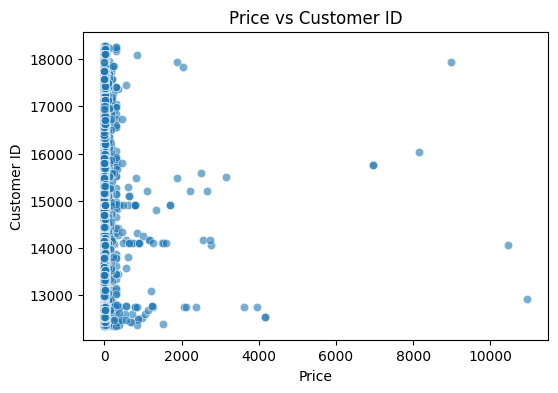

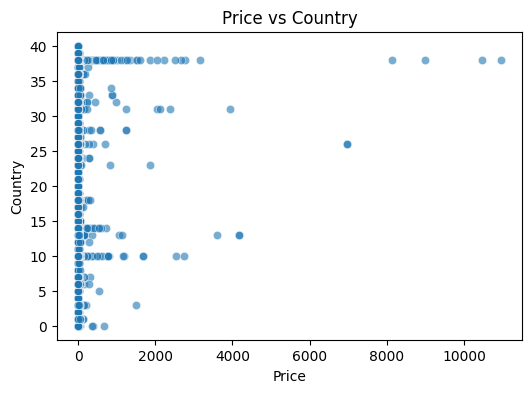

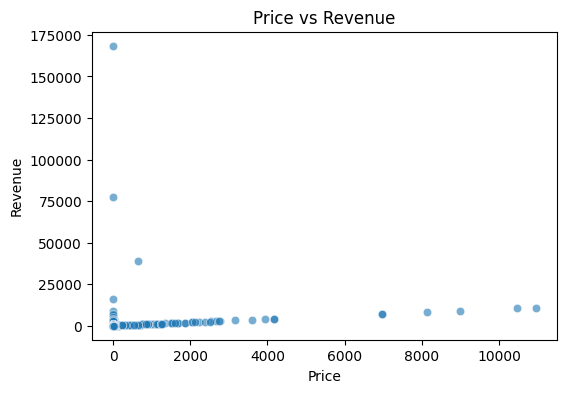

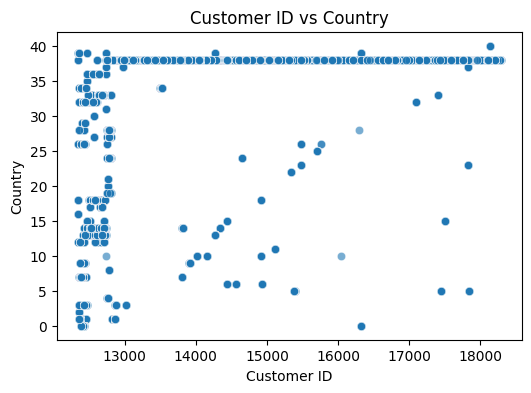

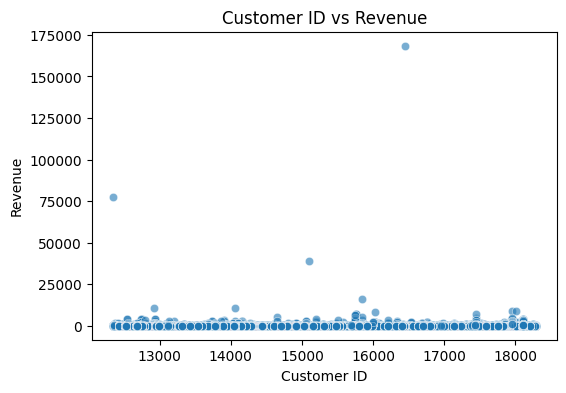

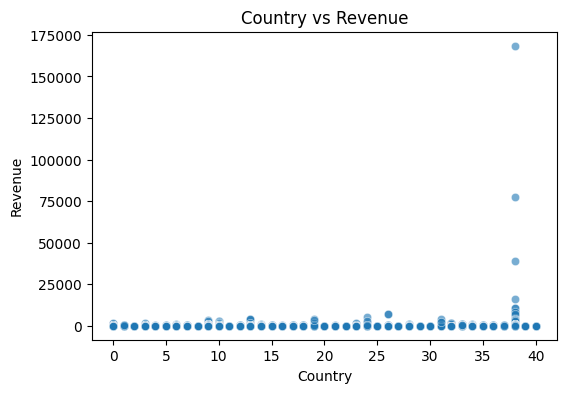

In [22]:
# 1) Numerical vs Numerical

num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# Scatter plots for each pair of numerical variables
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=num_cols[i], y=num_cols[j], alpha=0.6)
        plt.title(f"{num_cols[i]} vs {num_cols[j]}")
        plt.show()


**Correlation Heatmap**- To check the intensity of correlation between variables. This will help in formig problem statement and filtering out variables for further analysis.

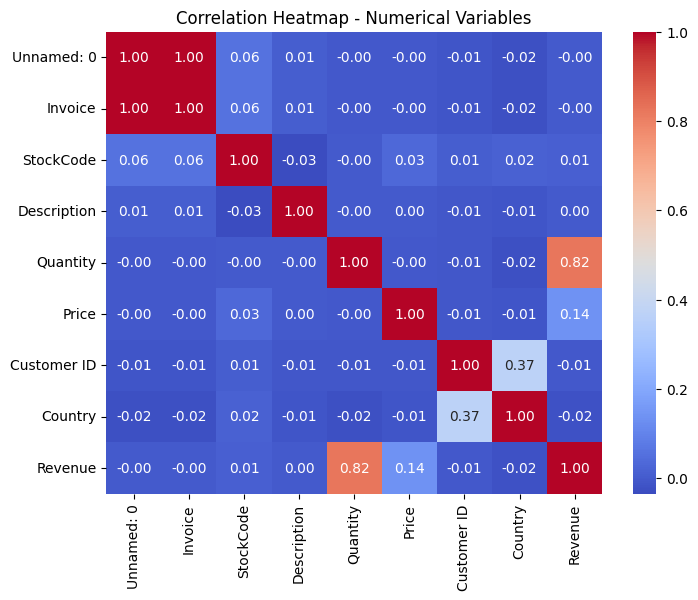

In [23]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Numerical Variables")
plt.show()

## Section IV - **Multi-variate Analysis**

## **Case 1**- Checking the Trend of **Price, Quantity & Revenue** over a period of time.

In [24]:
3# Ensure Date column is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Resample by Month
time_df = df.resample('M', on='InvoiceDate').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Create interactive subplot with Plotly
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=("Average Price over Time", "Total Quantity over Time", "Total Revenue over Time")
)

# Average Price
fig.add_trace(go.Scatter(
    x=time_df['InvoiceDate'],
    y=time_df['Price'],
    mode='lines+markers',
    line=dict(color='skyblue', width=3),
    marker=dict(size=7),
    name='Avg Price'
), row=1, col=1)

# Total Quantity
fig.add_trace(go.Scatter(
    x=time_df['InvoiceDate'],
    y=time_df['Quantity'],
    mode='lines+markers',
    line=dict(color='orange', width=3),
    marker=dict(size=7),
    name='Total Quantity'
), row=2, col=1)

# Total Revenue
fig.add_trace(go.Scatter(
    x=time_df['InvoiceDate'],
    y=time_df['Revenue'],
    mode='lines+markers',
    line=dict(color='green', width=3),
    marker=dict(size=7),
    name='Total Revenue'
), row=3, col=1)

# Layout aesthetics
fig.update_layout(
    title=dict(text="Monthly Performance Trends", x=0.5, xanchor='center', font=dict(size=22, color='black')),
    height=900,
    showlegend=False,
    template='plotly_white',
    hovermode='x unified'
)

fig.update_xaxes(title_text="Month", showgrid=True)
fig.update_yaxes(title_text="Value", showgrid=True)

fig.show()


/var/folders/cc/22lm2b1s2sd878p8qw5l0_kc0000gn/T/ipykernel_1623/2195802700.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_df = df.resample('M', on='InvoiceDate').agg({


## **Case 2**- Predicting Factor based Revenue 

In this case, we are aiming to predict **"Revenue"** in future by taking **"Price"** & **"Quantity"** into account as independent variables, as in what impact will be on revenue if the price and quantity changes.

In [25]:
# Features and Target
X = df[['Price', 'Quantity']]
y = df['Revenue']

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predictions
y_pred = reg.predict(X_test)

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [29]:
# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.643104905130478
RMSE: 124.09196812656906


The model shows **R2 score of 65%** approximately which is **"Moderate"** for a model. The independent variables Price and Quantity both are required as the standard logic equation says 

**Revenue = Price x Quantity**

## **Case 3** - Customer Segmentation (Big Spenders vs Small Spenders)

In this case, we aim to segment our customers into Big Spenders and Small Spenders which can help in organizational decisions in favour of customers.

Since it is a categorical problem so using Random Forrest & Logitics Regression would be appropriate.

Before applying model it is essential to define limits for the machine based on which "Big Spenders and "Small Spenders" will be categorized.

In [30]:
# Aggregate by Customer ID
customer_df = df.groupby('Customer ID').agg({
    'Revenue': 'sum',
    'Price': 'mean',
    'Quantity': 'mean',
    'InvoiceDate': 'max',
    'Country': 'first'
}).reset_index()

In [31]:
# Create Recency (days since last purchase)
max_date = df['InvoiceDate'].max()
customer_df['Recency'] = (max_date - customer_df['InvoiceDate']).dt.days

In [32]:
# Drop InvoiceDate (not needed anymore)
customer_df.drop(columns=['InvoiceDate'], inplace=True)

In [33]:
# Encode Country
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_df['Country'] = le.fit_transform(customer_df['Country'])

In [34]:
# Create Target: Big spender (top 25% revenue = 1, else 0)
threshold = customer_df['Revenue'].quantile(0.75)
customer_df['BigSpender'] = (customer_df['Revenue'] >= threshold).astype(int)

**Defining Target Variables**

In [35]:
# Features and Target
X = customer_df[['Price', 'Quantity', 'Country', 'Recency']]
y = customer_df['BigSpender']

In [36]:
# Drop rows with missing values in X or y
mask = X.notna().all(axis=1) & y.notna()
X_clean = X[mask]
y_clean = y[mask]

**3.1**- Initiating with **Logistic Regression** Model

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [38]:
# Try Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

divide by zero encountered in matmul

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

overflow encountered in matmul

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

invalid value encountered in matmul



LogisticRegression(max_iter=1000)

In [39]:
y_pred_log = log_clf.predict(X_test)

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/aryankhan/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



In [40]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7336448598130841
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       575
           1       0.65      0.41      0.50       281

    accuracy                           0.73       856
   macro avg       0.70      0.65      0.66       856
weighted avg       0.72      0.73      0.71       856



**3.2**- Initiating with **Random Forrest** Model

In [41]:
# Try Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predict
y_pred_rf = rf_clf.predict(X_test)

In [43]:
# Printing scores
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7184579439252337
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       575
           1       0.58      0.52      0.55       281

    accuracy                           0.72       856
   macro avg       0.68      0.67      0.67       856
weighted avg       0.71      0.72      0.71       856



**Model Comparison**- After applying **"Random Forrest"** and **"Logistic Regression"** it is found that model score of Logistic Regression is better which is 74%.